## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

## Load dataset

In [2]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
display(list(df.columns.values))
df.rename(columns={"passanger": "passenger"}, inplace=True)
df

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


## Fill missing values in data
- Count NAs per column
- Make a list of columns containing NAs
- Do not list columns containing more than 50% NAs<br>(insufficient data for replacement)
- Replace NAs with mode in all listed columns

(only to be used for categorical features,<br>numerical ones would require selecting the mean)

In [3]:
df.isna().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [4]:
columns_withNA = []

for index, value in df.isna().sum().items():
    if value>0 and value < (df.shape[0] / 2):
        columns_withNA.append(index)
print(columns_withNA)

for column in columns_withNA:
    print('Column is: ' + column)
    print('Mode is: ' + df[column].mode()[0])
    print()
    df[column] = df[column].fillna( df[column].mode()[0])

df.isna().sum()

['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
Column is: Bar
Mode is: never

Column is: CoffeeHouse
Mode is: less1

Column is: CarryAway
Mode is: 1~3

Column is: RestaurantLessThan20
Mode is: 1~3

Column is: Restaurant20To50
Mode is: less1



destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## One-hot-encoding
- make a list of all categorical features
- get an overview of occurring values
- drop all binary labeled features (already OHE)
- for each feature create new columns, one for each distinct value using pd.get_dummies()<br>
'FEATURE_IS_VALUE' (e.g. 'destination_IS_Home')

In [5]:
dfOHE = df
featuresToBeOHE = df.columns.drop('temperature')

for feature in featuresToBeOHE:
    print('Current feature: ' + feature)
    valueArray = df[feature].value_counts(dropna=False).index
    for value in valueArray:
        print(value)
    print()

featuresToBeOHE = featuresToBeOHE.drop(labels=['has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'])
print(featuresToBeOHE)

Current feature: destination
No Urgent Place
Home
Work

Current feature: passenger
Alone
Friend(s)
Partner
Kid(s)

Current feature: weather
Sunny
Snowy
Rainy

Current feature: time
6PM
7AM
10AM
2PM
10PM

Current feature: coupon
Coffee House
Restaurant(<20)
Carry out & Take away
Bar
Restaurant(20-50)

Current feature: expiration
1d
2h

Current feature: gender
Female
Male

Current feature: age
21
26
31
50plus
36
41
46
below21

Current feature: maritalStatus
Married partner
Single
Unmarried partner
Divorced
Widowed

Current feature: has_children
0
1

Current feature: education
Some college - no degree
Bachelors degree
Graduate degree (Masters or Doctorate)
Associates degree
High School Graduate
Some High School

Current feature: occupation
Unemployed
Student
Computer & Mathematical
Sales & Related
Education&Training&Library
Management
Office & Administrative Support
Arts Design Entertainment Sports & Media
Business & Financial
Retired
Food Preparation & Serving Related
Healthcare Practiti

In [6]:
dfOHE = pd.get_dummies(dfOHE, prefix_sep='_IS_', columns=featuresToBeOHE, dummy_na=False)
buffer = dfOHE.pop('Y')
dfOHE['Y'] = buffer
dfOHE.head()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_IS_Home,destination_IS_No Urgent Place,destination_IS_Work,...,RestaurantLessThan20_IS_4~8,RestaurantLessThan20_IS_gt8,RestaurantLessThan20_IS_less1,RestaurantLessThan20_IS_never,Restaurant20To50_IS_1~3,Restaurant20To50_IS_4~8,Restaurant20To50_IS_gt8,Restaurant20To50_IS_less1,Restaurant20To50_IS_never,Y
0,55,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,80,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,80,1,1,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,80,1,1,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,80,1,1,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0


## Train-Test-Split

In [7]:
df_train, df_test = train_test_split(dfOHE, random_state=257)
X_train = df_train.drop(columns=['Y'])
y_train = df_train['Y']

df_test = df_test.dropna()
X_test = df_test.drop(columns=['Y'])
y_test = df_test['Y']



## Feature Selection
#### 1. Univariate Selection

In [8]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train, y_train)
dfcolumns = pd.DataFrame(X_train.columns)
dfscores = pd.DataFrame(fit.scores_)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print('Top 20 Features:')
print(featureScores.nlargest(20, 'Score'))
print('\n\nBottom 10 Features:')
print(featureScores.nsmallest(10, 'Score'))

Top 20 Features:
                            Feature       Score
0                       temperature  211.388293
23  coupon_IS_Carry out & Take away  203.581136
26        coupon_IS_Restaurant(<20)  165.959110
22                    coupon_IS_Bar  162.123273
98             CoffeeHouse_IS_never  120.945825
11           passenger_IS_Friend(s)  108.712940
94               CoffeeHouse_IS_1~3   94.383038
4                 toCoupon_GEQ25min   90.365798
8    destination_IS_No Urgent Place   86.528807
28                 expiration_IS_2h   85.798154
25      coupon_IS_Restaurant(20-50)   78.233467
27                 expiration_IS_1d   67.853547
24           coupon_IS_Coffee House   56.150043
19                      time_IS_2PM   50.225508
14                 weather_IS_Rainy   45.712010
9               destination_IS_Work   42.745865
21                      time_IS_7AM   42.745865
10               passenger_IS_Alone   41.846316
7               destination_IS_Home   40.397402
15                 weat

#### 2. Feature Importance

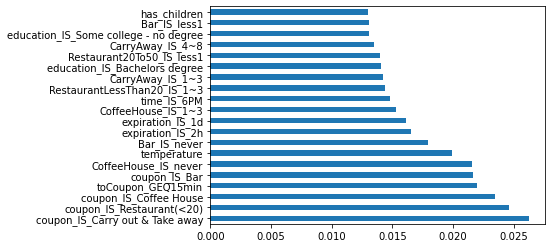

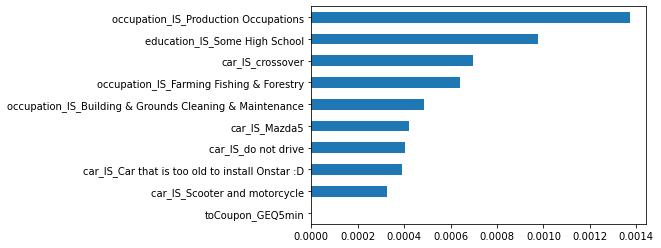

In [9]:
model = ExtraTreesClassifier(random_state=257)
model.fit(X_train, y_train)
#print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

#### 3. Correlation Matrix with Heatmap

In [10]:
corrmatrix = df_train.corr()
top_corr_features = corrmatrix.index

In [11]:
corrmatrix

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_IS_Home,destination_IS_No Urgent Place,destination_IS_Work,...,RestaurantLessThan20_IS_4~8,RestaurantLessThan20_IS_gt8,RestaurantLessThan20_IS_less1,RestaurantLessThan20_IS_never,Restaurant20To50_IS_1~3,Restaurant20To50_IS_4~8,Restaurant20To50_IS_gt8,Restaurant20To50_IS_less1,Restaurant20To50_IS_never,Y
temperature,1.000000,-0.020133,NaN,-0.160839,-0.219289,0.100373,-0.100373,-0.058629,0.137448,-0.099054,...,0.008569,0.029750,-0.007479,-0.031739,0.030303,-0.044398,0.000839,-0.040174,0.045513,0.062055
has_children,-0.020133,1.000000,NaN,0.080594,-0.014524,-0.031861,0.031861,-0.007245,0.025564,-0.022091,...,-0.045084,-0.034232,-0.031072,-0.036991,-0.021562,0.042976,-0.047531,0.035422,-0.030952,-0.038390
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.160839,0.080594,NaN,1.000000,0.325026,-0.309845,0.309845,-0.134776,0.039906,0.089251,...,-0.000257,-0.011360,0.009438,0.000887,-0.000784,-0.012048,-0.017895,0.011073,0.000329,-0.088193
toCoupon_GEQ25min,-0.219289,-0.014524,NaN,0.325026,1.000000,-0.194286,0.194286,0.050982,-0.360750,0.363100,...,-0.008853,-0.008781,0.011277,0.001989,-0.012136,-0.015383,-0.002093,0.010438,0.010600,-0.103856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Restaurant20To50_IS_4~8,-0.044398,0.042976,NaN,-0.012048,-0.015383,0.015600,-0.015600,0.005760,0.004498,-0.010937,...,0.119403,0.134584,-0.077418,-0.032345,-0.145550,1.000000,-0.035381,-0.244532,-0.110809,0.040096
Restaurant20To50_IS_gt8,0.000839,-0.047531,NaN,-0.017895,-0.002093,-0.003330,0.003330,-0.000214,-0.001604,0.002056,...,-0.059865,0.380572,-0.063565,-0.018831,-0.084739,-0.035381,1.000000,-0.142365,-0.064513,0.031853
Restaurant20To50_IS_less1,-0.040174,0.035422,NaN,0.011073,0.010438,-0.017881,0.017881,-0.010672,0.005620,0.004243,...,-0.057593,-0.143600,0.058096,-0.102441,-0.585661,-0.244532,-0.142365,1.000000,-0.445873,-0.021499
Restaurant20To50_IS_never,0.045513,-0.030952,NaN,0.000329,0.010600,0.018765,-0.018765,0.008297,-0.021058,0.015862,...,-0.089902,-0.100810,0.196476,0.187291,-0.265392,-0.110809,-0.064513,-0.445873,1.000000,-0.049827


In [12]:
#plt.figure(figsize=(115,115))
#g=sns.heatmap(df_train[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [13]:
#plt.figure(figsize=(115,115))
#g=sns.heatmap(df_train[top_corr_features].corr(), annot=False, cmap='RdYlGn')

#### 4. Creating different datasets by dropping low scoring features

In [14]:
top_25_features = list(featureScores.nlargest(25, 'Score').Feature)
top_50_features = list(featureScores.nlargest(50, 'Score').Feature)
top_75_features = list(featureScores.nlargest(75, 'Score').Feature)

X_train_top25 = X_train[top_25_features]
X_test_top25 = X_test[top_25_features]

X_train_top50 = X_train[top_50_features]
X_test_top50 = X_test[top_50_features]

X_train_top75 = X_train[top_75_features]
X_test_top75 = X_test[top_75_features]

## Scaling

In [15]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler25 = StandardScaler().fit(X_train_top25)
X_train_top25_scaled = scaler25.transform(X_train_top25)
X_test_top25_scaled = scaler25.transform(X_test_top25)

scaler50 = StandardScaler().fit(X_train_top50)
X_train_top50_scaled = scaler50.transform(X_train_top50)
X_test_top50_scaled = scaler50.transform(X_test_top50)

scaler75 = StandardScaler().fit(X_train_top75)
X_train_top75_scaled = scaler75.transform(X_train_top75)
X_test_top75_scaled = scaler75.transform(X_test_top75)

## Training
#### Logistic regression: C :[0.1,1,4,5,6,10,30,100] und penalty: ["l1", "l2"]

In [16]:
parameter_candidates = [{'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,2,5,10,30,100], 'penalty': ["l1", "l2"]}]
log = LogisticRegression(max_iter=1000,random_state=0)
clf = GridSearchCV(estimator=log, param_grid=parameter_candidates, n_jobs=-1)
clf_all = clf.fit(X_train_scaled, y_train)
clf_top25 = clf.fit(X_train_top25_scaled, y_train)
clf_top50 = clf.fit(X_train_top50_scaled, y_train)
clf_top75 = clf.fit(X_train_top75_scaled, y_train)
print('--- Training on all Features ---')
print('Best penalty:', clf_all.best_estimator_.penalty)
print('Best C:', clf_all.best_estimator_.C)

print('--- Training on top 25 Features ---')
print('Best penalty:', clf_top25.best_estimator_.penalty)
print('Best C:', clf_top25.best_estimator_.C)

print('--- Training on top 50 Features ---')
print('Best penalty:', clf_top50.best_estimator_.penalty)
print('Best C:', clf_top50.best_estimator_.C)

print('--- Training on top 75 Features ---')
print('Best penalty:', clf_top75.best_estimator_.penalty)
print('Best C:', clf_top75.best_estimator_.C)

C:\ProgramData\Miniconda3\envs\ML-Projektarbeit\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.68390581        nan 0.68369562        nan 0.68390587
        nan 0.68390587        nan 0.68390587        nan 0.68390587
        nan 0.68390587        nan 0.68401097        nan 0.68401097
        nan 0.68401097        nan 0.68411612        nan 0.68401097
        nan 0.68401097]
  warnings.warn(
C:\ProgramData\Miniconda3\envs\ML-Projektarbeit\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.67528674        nan 0.67507638        nan 0.67507638
        nan 0.67507638        nan 0.67507638        nan 0.67497123
        nan 0.67497123        nan 0.67497123        nan 0.67497123
        nan 0.67497123        nan 0.67497123        nan 0.67497123
        nan 0.67497123]
  warnings.warn(
C:\ProgramData\Miniconda3\envs\ML-Projektarbeit\li

--- Training on all Features ---
Best penalty: l2
Best C: 0.4
--- Training on top 25 Features ---
Best penalty: l2
Best C: 0.4
--- Training on top 50 Features ---
Best penalty: l2
Best C: 0.4
--- Training on top 75 Features ---
Best penalty: l2
Best C: 0.4


In [17]:
logisticRegr = LogisticRegression(max_iter=1000,C=clf_all.best_estimator_.C,penalty =clf_all.best_estimator_.penalty)
logisticRegr.fit(X_train_scaled, y_train)

logisticRegr_top25 = LogisticRegression(max_iter=1000,C=clf_top25.best_estimator_.C,penalty =clf_top25.best_estimator_.penalty)
logisticRegr_top25.fit(X_train_top25_scaled, y_train)

logisticRegr_top50 = LogisticRegression(max_iter=1000,C=clf_top50.best_estimator_.C,penalty =clf_top50.best_estimator_.penalty)
logisticRegr_top50.fit(X_train_top50_scaled, y_train)

logisticRegr_top75 = LogisticRegression(max_iter=1000,C=clf_top75.best_estimator_.C,penalty =clf_top75.best_estimator_.penalty)
logisticRegr_top75.fit(X_train_top75_scaled, y_train)

LogisticRegression(C=0.4, max_iter=1000)

#### Random Forest: n_estimators: [60,80,100,120,140] und max_depth: [2, 3, 4, 5]

In [18]:
parameter_candidates = [{'n_estimators': [200, 240, 260, 300], 'max_depth': [6, 7, 8, 9]}]
RFC = RandomForestClassifier(random_state=0)
clf = GridSearchCV(estimator=RFC, param_grid=parameter_candidates, n_jobs=-1)

clf_all = clf.fit(X_train_scaled, y_train)
clf_top25 = clf.fit(X_train_top25_scaled, y_train)
clf_top50 = clf.fit(X_train_top50_scaled, y_train)
clf_top75 = clf.fit(X_train_top75_scaled, y_train)

print('--- Training on all Features ---')
print('Best n:', clf_all.best_estimator_.n_estimators)
print('Best depth:', clf_all.best_estimator_.max_depth)

print('--- Training on top 25 Features ---')
print('Best n:', clf_top25.best_estimator_.n_estimators)
print('Best depth:', clf_top25.best_estimator_.max_depth)

print('--- Training on top 50 Features ---')
print('Best n:', clf_top50.best_estimator_.n_estimators)
print('Best depth:', clf_top50.best_estimator_.max_depth)

print('--- Training on top 75 Features ---')
print('Best n:', clf_top75.best_estimator_.n_estimators)
print('Best depth:', clf_top75.best_estimator_.max_depth)

--- Training on all Features ---
Best n: 300
Best depth: 9
--- Training on top 25 Features ---
Best n: 300
Best depth: 9
--- Training on top 50 Features ---
Best n: 300
Best depth: 9
--- Training on top 75 Features ---
Best n: 300
Best depth: 9


In [19]:
rf_all = RandomForestClassifier(random_state=0,max_depth=clf_all.best_estimator_.max_depth,n_estimators=clf_all.best_estimator_.n_estimators)
rf_all.fit(X_train_scaled,y_train)

rf_top25 = RandomForestClassifier(random_state=0,max_depth=clf_top25.best_estimator_.max_depth,n_estimators=clf_top25.best_estimator_.n_estimators)
rf_top25.fit(X_train_top25_scaled,y_train)

rf_top50 = RandomForestClassifier(random_state=0,max_depth=clf_top50.best_estimator_.max_depth,n_estimators=clf_top50.best_estimator_.n_estimators)
rf_top50.fit(X_train_top50_scaled,y_train)

rf_top75 = RandomForestClassifier(random_state=0,max_depth=clf_top75.best_estimator_.max_depth,n_estimators=clf_top75.best_estimator_.n_estimators)
rf_top75.fit(X_train_top75_scaled,y_train)

RandomForestClassifier(max_depth=9, n_estimators=300, random_state=0)

#### Gradient Boosting Tree: hyper params like in Random Forest.

In [20]:

parameter_candidates = [{'n_estimators': [200, 240, 260, 300], 'max_depth': [6, 7, 8, 9]}]
gbt = GradientBoostingClassifier(random_state=0)
clf = GridSearchCV(estimator=gbt, param_grid=parameter_candidates, n_jobs=-1)
clf_all = clf.fit(X_train_scaled, y_train)
print('Best n:', clf_all.best_estimator_.n_estimators)
print('Best depth:', clf_all.best_estimator_.max_depth)

Best n: 260
Best depth: 7


In [21]:
gbt_all = GradientBoostingClassifier(random_state=0,max_depth=clf_all.best_estimator_.max_depth,n_estimators=clf_all.best_estimator_.n_estimators)
gbt_all.fit(X_train_scaled,y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=260, random_state=0)

## Predictions
#### Logistic regression

In [22]:
pred_prob_log_all = logisticRegr.predict_proba(X_test_scaled)
pred_prob_log_top25 = logisticRegr_top25.predict_proba(X_test_top25_scaled)
pred_prob_log_top50 = logisticRegr_top50.predict_proba(X_test_top50_scaled)
pred_prob_log_top75 = logisticRegr_top75.predict_proba(X_test_top75_scaled)

predictions_log_all = logisticRegr.predict(X_test_scaled)
predictions_log_top25 = logisticRegr_top25.predict(X_test_top25_scaled)
predictions_log_top50 = logisticRegr_top50.predict(X_test_top50_scaled)
predictions_log_top75 = logisticRegr_top75.predict(X_test_top75_scaled)

#### Random Forest

In [23]:
pred_prob_rf_all = rf_all.predict_proba(X_test_scaled)
pred_prob_rf_top25 = rf_top25.predict_proba(X_test_top25_scaled)
pred_prob_rf_top50 = rf_top50.predict_proba(X_test_top50_scaled)
pred_prob_rf_top75 = rf_top75.predict_proba(X_test_top75_scaled)

predictions_rf_all = rf_all.predict(X_test_scaled)
predictions_rf_top25 = rf_top25.predict(X_test_top25_scaled)
predictions_rf_top50 = rf_top50.predict(X_test_top50_scaled)
predictions_rf_top75 = rf_top75.predict(X_test_top75_scaled)

#### Gradient Boosting

In [24]:
pred_prob_gbt_all = gbt_all.predict_proba(X_test_scaled)

predictions_gbt_all = gbt_all.predict(X_test_scaled)

## Label Distribution

C:\ProgramData\Miniconda3\envs\ML-Projektarbeit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


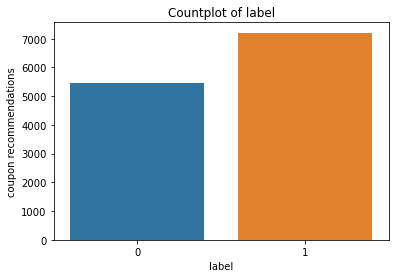

Positive label ratio: 56.84%


In [25]:
sns.countplot(dfOHE.Y)
plt.title('Countplot of label')
plt.xlabel('label')
plt.ylabel('coupon recommendations')
plt.show()
label_ratio = df[df['Y'] == 1]['Y'].count() / df['Y'].count()
format_label_ratio = "{:.2f}".format(label_ratio*100)
print('Positive label ratio: '+ format_label_ratio + '%')

## Evaluation for Logistic Regression
#### ROC Curves<br>(Receiver Opterating Characteristic Curve)

In [26]:
fpr_log_all, tpr_log_all, thresholds_log_all = roc_curve(y_test, pred_prob_log_all[:,1], pos_label=1)
auc_score_log_all = roc_auc_score(y_test, pred_prob_log_all[:,1])

fpr_log_top25, tpr_log_top25, thresholds_log_top25 = roc_curve(y_test, pred_prob_log_top25[:,1], pos_label=1)
auc_score_log_top25 = roc_auc_score(y_test, pred_prob_log_top25[:,1])

fpr_log_top50, tpr_log_top50, thresholds_log_top50 = roc_curve(y_test, pred_prob_log_top50[:,1], pos_label=1)
auc_score_log_top50 = roc_auc_score(y_test, pred_prob_log_top50[:,1])

fpr_log_top75, tpr_log_top75, thresholds_log_top75 = roc_curve(y_test, pred_prob_log_top75[:,1], pos_label=1)
auc_score_log_top75 = roc_auc_score(y_test, pred_prob_log_top75[:,1])

print('Log Reg all features')
print('AUC-ROC score: ' + str(auc_score_log_all) + '\n')

print('Log Reg top25 features')
print('AUC-ROC score: ' + str(auc_score_log_top25) + '\n')

print('Log Reg top50 features')
print('AUC-ROC score: ' + str(auc_score_log_top50) + '\n')

print('Log Reg top75 features')
print('AUC-ROC score: ' + str(auc_score_log_top75) + '\n')

Log Reg all features
AUC-ROC score: 0.7351847111501174

Log Reg top25 features
AUC-ROC score: 0.7163296277334894

Log Reg top50 features
AUC-ROC score: 0.7298101692711507

Log Reg top75 features
AUC-ROC score: 0.7321911796972134



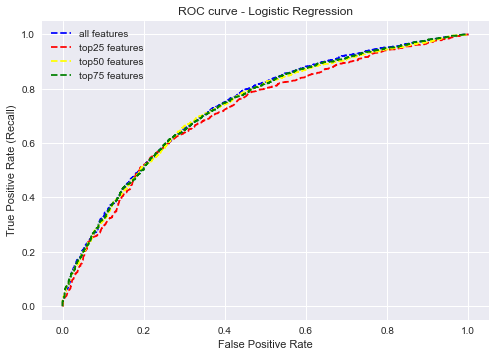

In [27]:
plt.style.use('seaborn')
plt.plot(fpr_log_all, tpr_log_all, linestyle='--', color='blue', label='all features')
plt.plot(fpr_log_top25, tpr_log_top25, linestyle='--', color='red', label='top25 features')
plt.plot(fpr_log_top50, tpr_log_top50, linestyle='--', color='yellow', label='top50 features')
plt.plot(fpr_log_top75, tpr_log_top75, linestyle='--', color='green', label='top75 features')
plt.title('ROC curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.savefig('ROC Logreg', dpi=300)
plt.show()

#### PRC (Precision-Recall-Curve)

In [28]:
precision_log_all, recall_log_all, thresholds_log_all = precision_recall_curve(y_test, pred_prob_log_all[:,1])
auc_prc_log_all = auc(recall_log_all, precision_log_all)
print('Log Reg all features')
print('AUC-PRC score: ' + str(auc_prc_log_all) + '\n')

precision_log_top25, recall_log_top25, thresholds_log_top25 = precision_recall_curve(y_test, pred_prob_log_top25[:,1])
auc_prc_log_top25 = auc(recall_log_top25, precision_log_top25)
print('Log Reg top25 features')
print('AUC-PRC score: ' + str(auc_prc_log_top25) + '\n')

precision_log_top50, recall_log_top50, thresholds_log_top50 = precision_recall_curve(y_test, pred_prob_log_top50[:,1])
auc_prc_log_top50 = auc(recall_log_top50, precision_log_top50)
print('Log Reg top50 features')
print('AUC-PRC score: ' + str(auc_prc_log_top50) + '\n')

precision_log_top75, recall_log_top75, thresholds_log_top75 = precision_recall_curve(y_test, pred_prob_log_top75[:,1])
auc_prc_log_top75 = auc(recall_log_top75, precision_log_top75)
print('Log Reg top75 features')
print('AUC-PRC score: ' + str(auc_prc_log_top75) + '\n')

Log Reg all features
AUC-PRC score: 0.7732539765529091

Log Reg top25 features
AUC-PRC score: 0.7521317134742832

Log Reg top50 features
AUC-PRC score: 0.7707390576985277

Log Reg top75 features
AUC-PRC score: 0.772210029876744



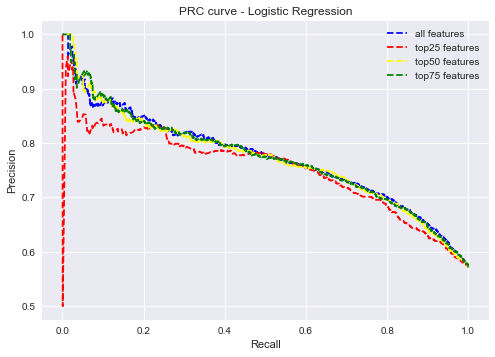

In [29]:
plt.style.use('seaborn')
plt.plot(recall_log_all, precision_log_all, linestyle='--', color='blue', label='all features')
plt.plot(recall_log_top25, precision_log_top25, linestyle='--', color='red', label='top25 features')
plt.plot(recall_log_top50, precision_log_top50, linestyle='--', color='yellow', label='top50 features')
plt.plot(recall_log_top75, precision_log_top75, linestyle='--', color='green', label='top75 features')
plt.title('PRC curve - Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PRC Logreg', dpi=300)
plt.show()

#### Accuracy, precision and recall, f1-score

In [30]:
print('--- Log reg on all features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_log_all))
print("Recall is:")
print(recall_score(y_test, predictions_log_all))
print("Precision is:")
print(precision_score(y_test, predictions_log_all))
print("F1-Score is:")
print(f1_score(y_test, predictions_log_all))
print()

print('--- Log reg on top25 features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_log_top25))
print("Recall is:")
print(recall_score(y_test, predictions_log_top25))
print("Precision is:")
print(precision_score(y_test, predictions_log_top25))
print("F1-Score is:")
print(f1_score(y_test, predictions_log_top25))
print()

print('--- Log reg on top50 features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_log_top50))
print("Recall is:")
print(recall_score(y_test, predictions_log_top50))
print("Precision is:")
print(precision_score(y_test, predictions_log_top50))
print("F1-Score is:")
print(f1_score(y_test, predictions_log_top50))
print()

print('--- Log reg on top75 features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_log_top75))
print("Recall is:")
print(recall_score(y_test, predictions_log_top75))
print("Precision is:")
print(precision_score(y_test, predictions_log_top75))
print("F1-Score is:")
print(f1_score(y_test, predictions_log_top75))
print()

--- Log reg on all features ---
Accuracy score is:
0.6877956480605487
Recall is:
0.7658402203856749
Precision is:
0.710997442455243
F1-Score is:
0.7374005305039787

--- Log reg on top25 features ---
Accuracy score is:
0.674550614947966
Recall is:
0.7509641873278237
Precision is:
0.7014925373134329
F1-Score is:
0.7253858435337946

--- Log reg on top50 features ---
Accuracy score is:
0.6827499211605171
Recall is:
0.7581267217630854
Precision is:
0.7081832218219248
F1-Score is:
0.7323044172432144

--- Log reg on top75 features ---
Accuracy score is:
0.6840113528855251
Recall is:
0.7570247933884298
Precision is:
0.710077519379845
F1-Score is:
0.7328



## Evaluation for Random Forest
#### ROC Curves<br>(Receiver Opterating Characteristic Curve)

In [31]:
fpr_rf_all, tpr_rf_all, thresholds_rf_all = roc_curve(y_test, pred_prob_rf_all[:,1], pos_label=1)
auc_score_rf_all = roc_auc_score(y_test, pred_prob_rf_all[:,1])

fpr_rf_top25, tpr_rf_top25, thresholds_rf_top25 = roc_curve(y_test, pred_prob_rf_top25[:,1], pos_label=1)
auc_score_rf_top25 = roc_auc_score(y_test, pred_prob_rf_top25[:,1])

fpr_rf_top50, tpr_rf_top50, thresholds_rf_top50 = roc_curve(y_test, pred_prob_rf_top50[:,1], pos_label=1)
auc_score_rf_top50 = roc_auc_score(y_test, pred_prob_rf_top50[:,1])

fpr_rf_top75, tpr_rf_top75, thresholds_rf_top75 = roc_curve(y_test, pred_prob_rf_top75[:,1], pos_label=1)
auc_score_rf_top75 = roc_auc_score(y_test, pred_prob_rf_top75[:,1])

print('RF  all features')
print('AUC-ROC score: ' + str(auc_score_rf_all) + '\n')

print('RF  top25 features')
print('AUC-ROC score: ' + str(auc_score_rf_top25) + '\n')

print('RF  top50 features')
print('AUC-ROC score: ' + str(auc_score_rf_top50) + '\n')

print('RF  top75 features')
print('AUC-ROC score: ' + str(auc_score_rf_top75) + '\n')

RF  all features
AUC-ROC score: 0.7915110477258507

RF  top25 features
AUC-ROC score: 0.74568634860268

RF  top50 features
AUC-ROC score: 0.77910927456382

RF  top75 features
AUC-ROC score: 0.7825178575781955



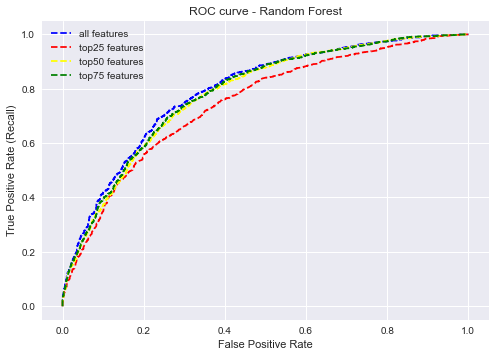

In [32]:
plt.style.use('seaborn')
plt.plot(fpr_rf_all, tpr_rf_all, linestyle='--', color='blue', label='all features')
plt.plot(fpr_rf_top25, tpr_rf_top25, linestyle='--', color='red', label='top25 features')
plt.plot(fpr_rf_top50, tpr_rf_top50, linestyle='--', color='yellow', label='top50 features')
plt.plot(fpr_rf_top75, tpr_rf_top75, linestyle='--', color='green', label='top75 features')
plt.title('ROC curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.savefig('ROC RF', dpi=300)
plt.show()

#### PRC (Precision-Recall-Curve)

In [33]:
precision_rf_all, recall_rf_all, thresholds_rf_all = precision_recall_curve(y_test, pred_prob_rf_all[:,1])
auc_prc_rf_all = auc(recall_rf_all, precision_rf_all)
print('RF  all features')
print('AUC-PRC score: ' + str(auc_prc_rf_all) + '\n')

precision_rf_top25, recall_rf_top25, thresholds_rf_top25 = precision_recall_curve(y_test, pred_prob_rf_top25[:,1])
auc_prc_rf_top25 = auc(recall_rf_top25, precision_rf_top25)
print('RF  top25 features')
print('AUC-PRC score: ' + str(auc_prc_rf_top25) + '\n')

precision_rf_top50, recall_rf_top50, thresholds_rf_top50 = precision_recall_curve(y_test, pred_prob_rf_top50[:,1])
auc_prc_rf_top50 = auc(recall_rf_top50, precision_rf_top50)
print('RF  top50 features')
print('AUC-PRC score: ' + str(auc_prc_rf_top50) + '\n')

precision_rf_top75, recall_rf_top75, thresholds_rf_top75 = precision_recall_curve(y_test, pred_prob_rf_top75[:,1])
auc_prc_rf_top75 = auc(recall_rf_top75, precision_rf_top75)
print('RF  top75 features')
print('AUC-PRC score: ' + str(auc_prc_rf_top75) + '\n')

RF  all features
AUC-PRC score: 0.8212398913695533

RF  top25 features
AUC-PRC score: 0.7846502676081076

RF  top50 features
AUC-PRC score: 0.8073026589021923

RF  top75 features
AUC-PRC score: 0.8114317904476485



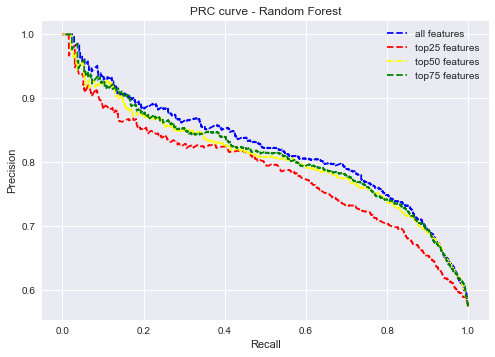

In [34]:
plt.style.use('seaborn')
plt.plot(recall_rf_all, precision_rf_all, linestyle='--', color='blue', label='all features')
plt.plot(recall_rf_top25, precision_rf_top25, linestyle='--', color='red', label='top25 features')
plt.plot(recall_rf_top50, precision_rf_top50, linestyle='--', color='yellow', label='top50 features')
plt.plot(recall_rf_top75, precision_rf_top75, linestyle='--', color='green', label='top75 features')
plt.title('PRC curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PRC RF', dpi=300)
plt.show()

#### Accuracy, precision and recall, f1-score

In [35]:
print('--- Random Forest on all features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_rf_all))
print("Recall is:")
print(recall_score(y_test, predictions_rf_all))
print("Precision is:")
print(precision_score(y_test, predictions_rf_all))
print("F1-Score is:")
print(f1_score(y_test, predictions_rf_all))
print()

print('--- Random Forest on top25 features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_rf_top25))
print("Recall is:")
print(recall_score(y_test, predictions_rf_top25))
print("Precision is:")
print(precision_score(y_test, predictions_rf_top25))
print("F1-Score is:")
print(f1_score(y_test, predictions_rf_top25))
print()

print('--- Random Forest on top50 features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_rf_top50))
print("Recall is:")
print(recall_score(y_test, predictions_rf_top50))
print("Precision is:")
print(precision_score(y_test, predictions_rf_top50))
print("F1-Score is:")
print(f1_score(y_test, predictions_rf_top50))
print()

print('--- Random Forest on top75 features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_rf_top75))
print("Recall is:")
print(recall_score(y_test, predictions_rf_top75))
print("Precision is:")
print(precision_score(y_test, predictions_rf_top75))
print("F1-Score is:")
print(f1_score(y_test, predictions_rf_top75))
print()


--- Random Forest on all features ---
Accuracy score is:
0.7360454115421002
Recall is:
0.8556473829201102
Precision is:
0.7297932330827067
F1-Score is:
0.7877250824245499

--- Random Forest on top25 features ---
Accuracy score is:
0.6912645853043204
Recall is:
0.7691460055096419
Precision is:
0.7137014314928425
F1-Score is:
0.7403871652081676

--- Random Forest on top50 features ---
Accuracy score is:
0.7243771680857773
Recall is:
0.8209366391184573
Precision is:
0.7307503678273664
F1-Score is:
0.7732226258432796

--- Random Forest on top75 features ---
Accuracy score is:
0.7313150425733207
Recall is:
0.8341597796143251
Precision is:
0.7331719128329298
F1-Score is:
0.7804123711340207



## Evaluation for Gradient Boosting Tree
#### ROC Curves<br>(Receiver Opterating Characteristic Curve)

In [36]:
fpr_gbt_all, tpr_gbt_all, thresholds_gbt_all = roc_curve(y_test, pred_prob_gbt_all[:,1], pos_label=1)
auc_score_gbt_all = roc_auc_score(y_test, pred_prob_gbt_all[:,1])

print('GBT  all features')
print('AUC-ROC score: ' + str(auc_score_gbt_all) + '\n')

GBT  all features
AUC-ROC score: 0.8387745109989679



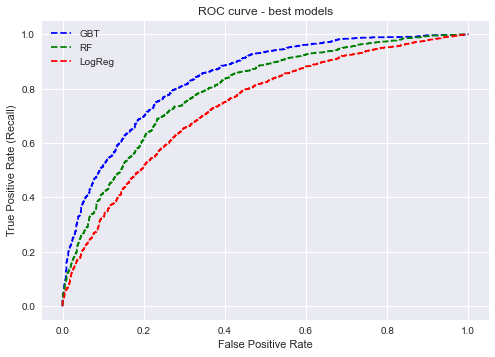

In [37]:
plt.style.use('seaborn')
plt.plot(fpr_gbt_all, tpr_gbt_all, linestyle='--', color='blue', label='GBT')
plt.plot(fpr_rf_all, tpr_rf_all, linestyle='--', color='green', label='RF')
plt.plot(fpr_log_all, tpr_log_all, linestyle='--', color='red', label='LogReg')
plt.title('ROC curve - best models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='best')
plt.savefig('ROC best models', dpi=300)
plt.show()

#### PRC (Precision-Recall-Curve)

In [38]:
precision_gbt_all, recall_gbt_all, thresholds_gbt_all = precision_recall_curve(y_test, pred_prob_gbt_all[:,1])
auc_prc_gbt_all = auc(recall_gbt_all, precision_gbt_all)
print('GBT  all features')
print('AUC-PRC score: ' + str(auc_prc_gbt_all) + '\n')

GBT  all features
AUC-PRC score: 0.862360695937081



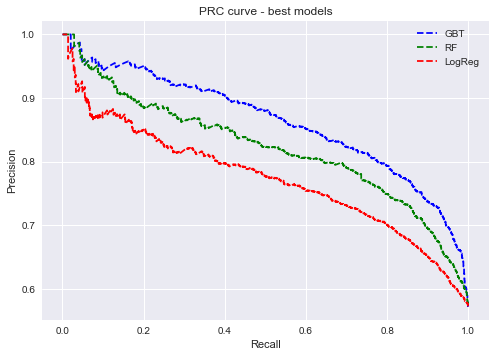

In [39]:
plt.style.use('seaborn')
plt.plot(recall_gbt_all, precision_gbt_all, linestyle='--', color='blue', label='GBT')
plt.plot(recall_rf_all, precision_rf_all, linestyle='--', color='green', label='RF')
plt.plot(recall_log_all, precision_log_all, linestyle='--', color='red', label='LogReg')
plt.title('PRC curve - best models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PRC best models', dpi=300)
plt.show()

#### Accuracy, precision and recall, f1-score

In [40]:
print('--- Gradient Boosting Tree on all features ---')
print("Accuracy score is:")
print(accuracy_score(y_test, predictions_gbt_all))
print("Recall is:")
print(recall_score(y_test, predictions_gbt_all))
print("Precision is:")
print(precision_score(y_test, predictions_gbt_all))
print("F1-Score is:")
print(f1_score(y_test, predictions_gbt_all))
print()

--- Gradient Boosting Tree on all features ---
Accuracy score is:
0.7650583412172817
Recall is:
0.809366391184573
Precision is:
0.7864025695931478
F1-Score is:
0.7977192506109151



In [41]:
pred_prob_log_all

array([[0.54500721, 0.45499279],
       [0.33406503, 0.66593497],
       [0.80260731, 0.19739269],
       ...,
       [0.44598492, 0.55401508],
       [0.27287537, 0.72712463],
       [0.78697836, 0.21302164]])

In [42]:
thresholds_log_all

array([0.07140788, 0.07350582, 0.07440895, ..., 0.95867875, 0.9635359 ,
       0.96956882])

In [43]:
len(thresholds_log_all)

3158

In [44]:
testy = pd.DataFrame(data= {'fpr':fpr_log_all, 'tpr':tpr_log_all})
testy

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.000551
2,0.000000,0.013774
3,0.000737,0.013774
4,0.000737,0.024793
...,...,...
1331,0.987463,0.998898
1332,0.987463,0.999449
1333,0.997050,0.999449
1334,0.997050,1.000000
